TASK-2

MOVIE RATING PREDECTION USING PYTHON

IMPORT REQURED PACKAGES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import os

LOADING THE DATASET INTO THE PANDAS LIBRARY

In [3]:
movie=pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [5]:
movie.shape

(15509, 10)

In [6]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Get Overall Statistics About The DataFrame

In [30]:
movie.describe()

,Year,Duration,Rating,Votes,Genre_encoded,Genre_mean_rating,Director_encoded,Actor_encoded
count,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116,236.653734,5.931875,5.931875,5.931875
std,19.914640,26.555826,1.389942,13433.828528,300.497493,0.624430,1.129282,1.044008
min,1931.000000,21.000000,1.100000,5.000000,1.000000,2.000000,1.600000,1.400000
25%,1983.000000,117.000000,5.000000,28.000000,29.000000,5.540157,5.280000,5.322857
50%,2002.000000,134.000000,6.100000,119.000000,118.000000,5.934483,6.023077,6.000000
75%,2013.000000,150.000000,7.000000,862.500000,329.000000,6.419423,6.700000,6.651852
max,2021.000000,321.000000,10.000000,591417.000000,901.000000,9.400000,10.000000,10.000000


Check Null Values In The Dataset

In [31]:
movie.isna().sum()

Name                 0
Year                 0
Duration             0
Genre                0
Rating               0
Votes                0
Director             0
Actor 1              0
Genre_encoded        0
Genre_mean_rating    0
Director_encoded     0
Actor_encoded        0
dtype: int64

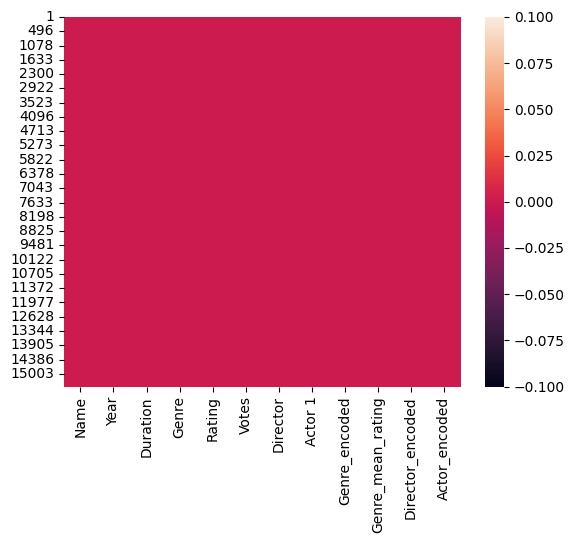

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(movie.isnull())
plt.show()

FINDING MISSING VALUES

In [8]:
def missing_values_with_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_with_percent(movie)
result


,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [9]:
def missing_values_per_row(dataframe):
    # Count missing values in each row and sort in descending order
    sorted_indices = dataframe.isnull().sum(axis=1).sort_values(ascending=False)

    # Create a DataFrame with the counts and sorted indices
    result_df = pd.DataFrame({
        'Missing Values Count': sorted_indices.values
    }, index=sorted_indices.index)

    return result_df

# Call the function with your DataFrame 'movie'
result = missing_values_per_row(movie)
result


,Missing Values Count
1920,9
1836,9
3807,9
8669,9
9600,9
...,...
7385,0
7383,0
7380,0
7377,0


Drop All The Missing Values

In [88]:
movie = movie.dropna(axis=0)

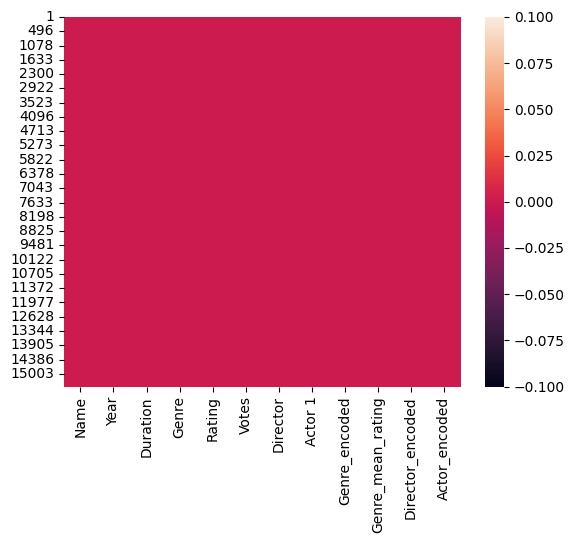

In [90]:
sns.heatmap(movie.isnull())
plt.show()

DROP USELESS COLUMNS

In [10]:
movie.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [11]:
 movie[movie['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav


In [12]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [13]:
movie.dropna(subset=['Duration'], inplace= True)

In [14]:
movie = movie[movie.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


<ipython-input-14-d0f85580facd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie = movie[movie.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


In [15]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [17]:
movie.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = movie['Director'].describe()
director_counts = movie['Director'].value_counts().sort_values(ascending=False)
movie['Director'].fillna('David Dhawan', inplace=True)
genre_counts = movie['Genre'].value_counts().sort_values(ascending=False)
movie['Genre'].fillna('Drama', inplace=True)
actor1_description = movie['Actor 1'].describe()
movie['Actor 1'].fillna('Amitabh Bachchan', inplace=True)
missing_values_df = pd.DataFrame({
    'Missing Values': movie.isnull().sum(),
    'Percentage': (movie.isnull().sum() / len(movie) * 100).round(2)
})

movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [18]:
missing_values_with_percent(movie)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


In [19]:
movie['Year'] = movie['Year'].str.replace(r'[()]', '', regex=True)
movie['Duration'] = movie['Duration'].str.replace(r' min', '', regex=True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [20]:
int_columns = ['Year', 'Duration']
movie[int_columns] = movie[int_columns].astype(int)
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


Check For Duplicate Data

In [92]:
dup_movie=movie.duplicated().any()
print("Are there any duplicated values in data?",dup_movie)

Are there any duplicated values in data? False


In Which Year There Was The Highest Voting?

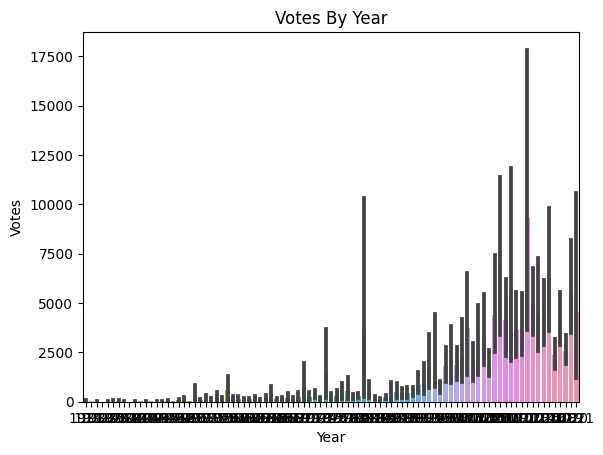

In [93]:
sns.barplot(x='Year',y='Votes',data=movie)
plt.title("Votes By Year")
plt.show()

Find The Average Rating For Each Director

In [96]:
movie.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Arvind Pratap        9.4
Munni Pankaj         9.4
Suhrud Godbole       9.4
                    ... 
Navin Batra          1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2549, dtype: float64

Display Number of Movies Per Year

Text(0.5, 1.0, 'Number of Movies Per Year')

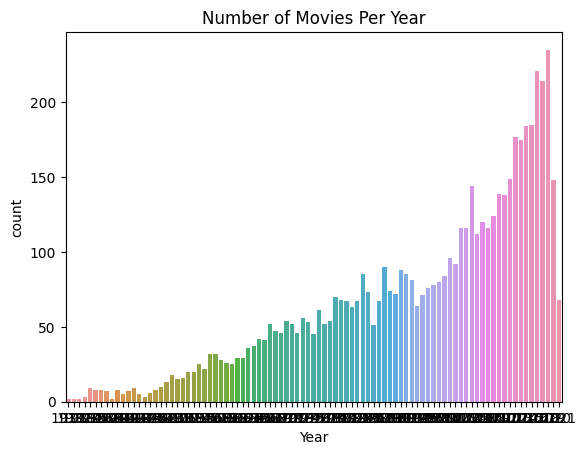

In [97]:
sns.countplot(x='Year',data=movie)
plt.title("Number of Movies Per Year")

VISUALIZING THE DATA

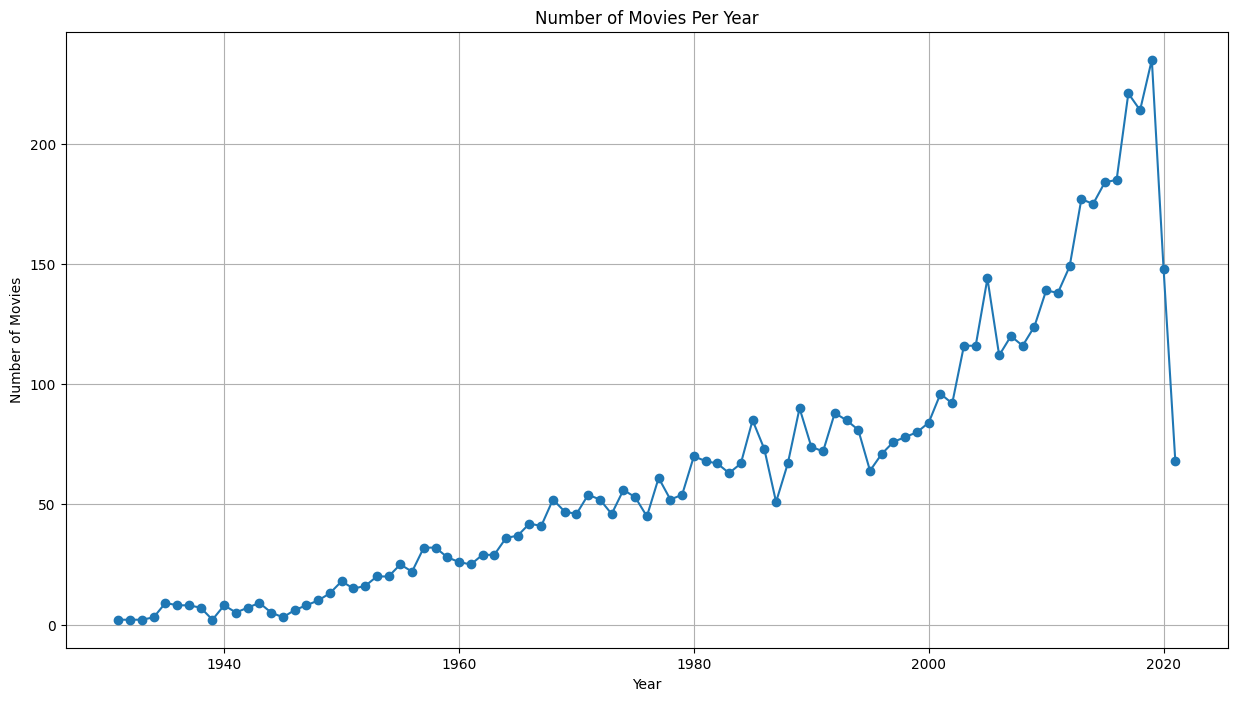

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

year_counts = movie['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.grid(True)

plt.show()


<Axes: >

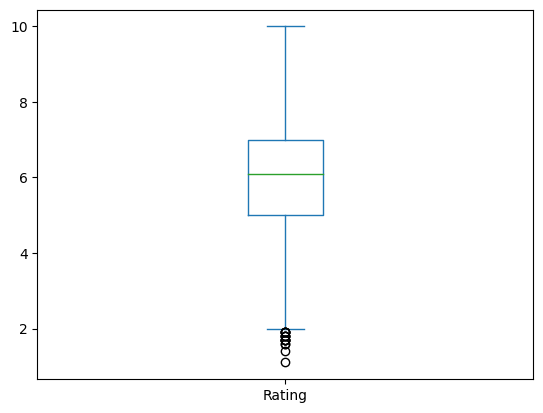

In [22]:
movie['Rating'].plot(kind='box')

<Axes: >

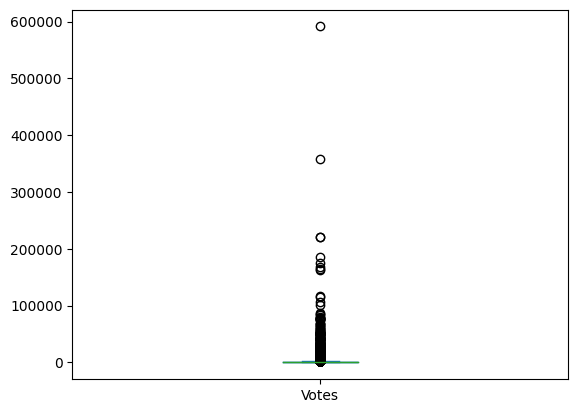

In [23]:
movie['Votes'].plot(kind='box')

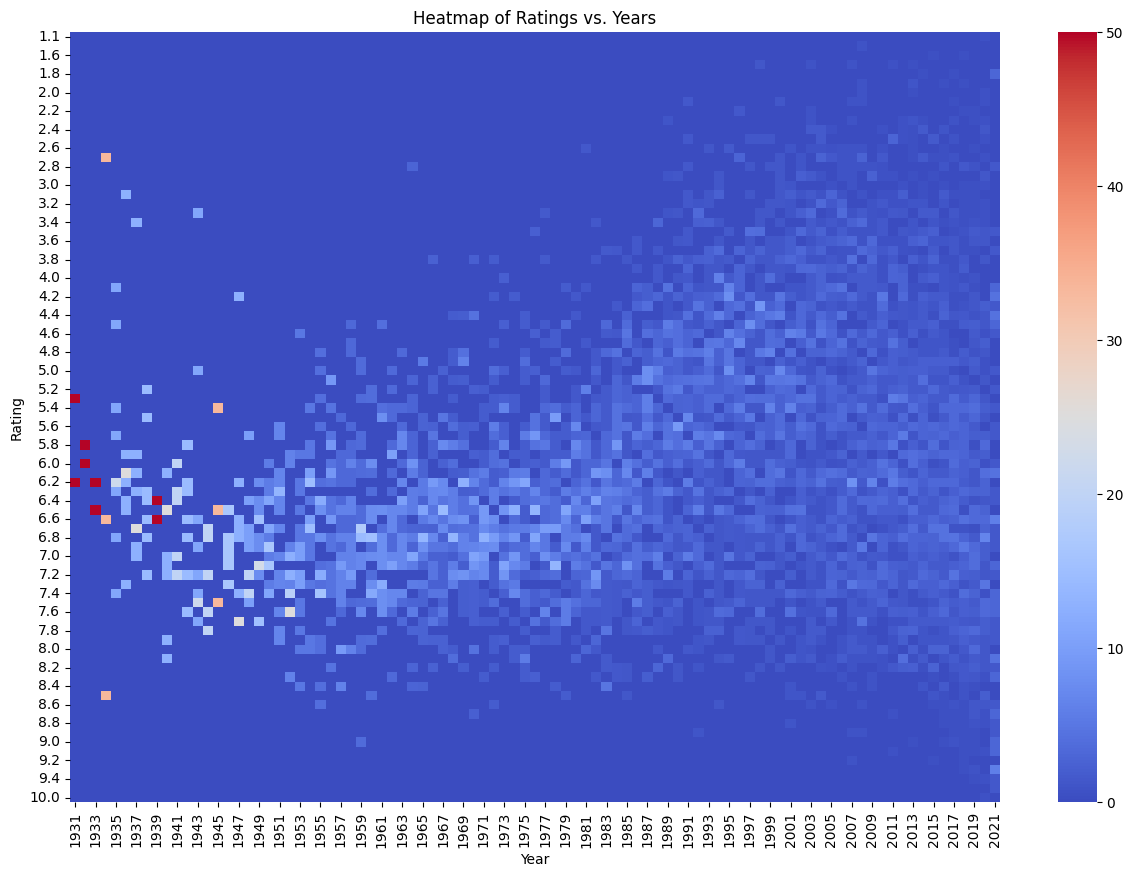

In [24]:
plt.figure(figsize=(15, 10))

# Create a heatmap with a different colormap ('coolwarm')
sns.heatmap(
    pd.crosstab(movie['Rating'], movie['Year'], normalize='columns') * 100,
    cmap='coolwarm',
)

plt.title('Heatmap of Ratings vs. Years')
plt.xlabel('Year')
plt.ylabel('Rating')

plt.show()


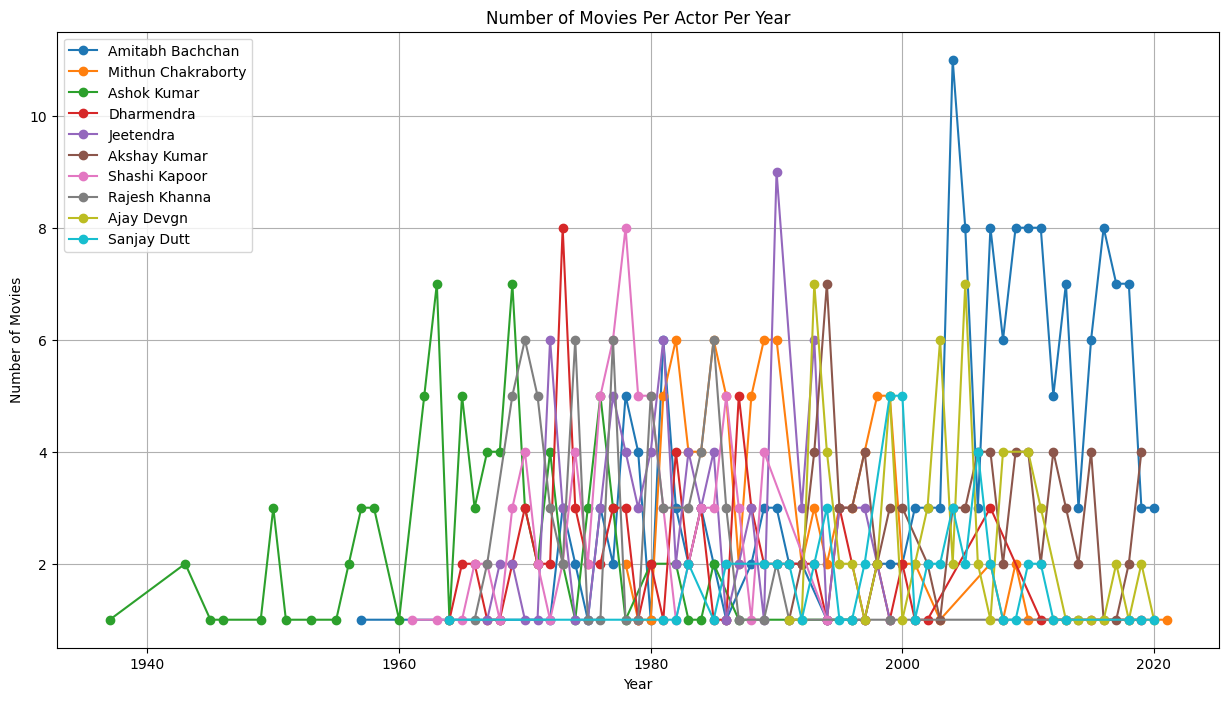

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Replace 'Actor 1' with the column name containing actor names
# Replace 'Year' with the column name containing years
top_actors = movie['Actor 1'].value_counts().head(10).index

for actor in top_actors:
    actor_data = movie[movie['Actor 1'] == actor]
    actor_counts = actor_data['Year'].value_counts().sort_index()
    plt.plot(actor_counts.index, actor_counts.values, marker='o', label=actor)

plt.title('Number of Movies Per Actor Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left')

plt.grid(True)

plt.show()


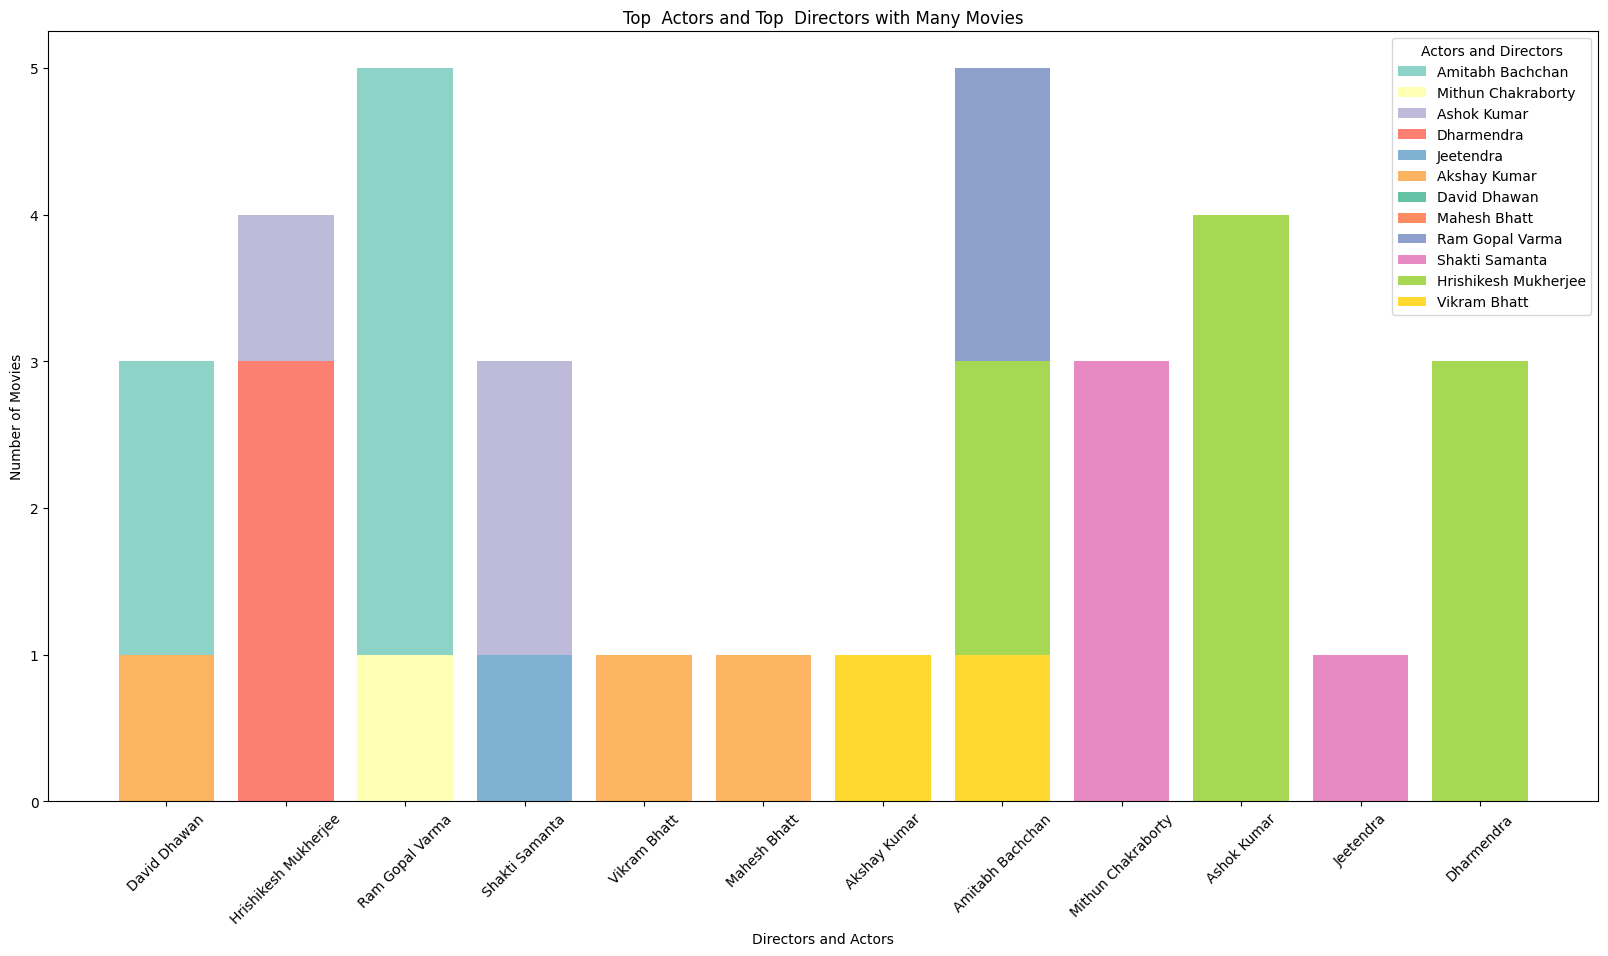

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

# Replace 'df' with 'movie'
top_actors = movie['Actor 1'].value_counts().head(6).index
top_directors = movie['Director'].value_counts().head(6).index

# Initialize a color palette for actors and directors
actor_palette = sns.color_palette('Set3', n_colors=len(top_actors))
director_palette = sns.color_palette('Set2', n_colors=len(top_directors))

# Initialize variables to keep track of the x positions
actor_x_pos = 0
director_x_pos = 0

for actor in top_actors:
    actor_data = movie[movie['Actor 1'] == actor]
    director_counts = actor_data[actor_data['Director'].isin(top_directors)]['Director'].value_counts().sort_index()
    plt.bar(director_counts.index, director_counts.values, label=actor, color=actor_palette[actor_x_pos])
    actor_x_pos += 1

for director in top_directors:
    director_data = movie[movie['Director'] == director]
    actor_counts = director_data[director_data['Actor 1'].isin(top_actors)]['Actor 1'].value_counts().sort_index()
    plt.bar(actor_counts.index, actor_counts.values, label=director, color=director_palette[director_x_pos])
    director_x_pos += 1

plt.title('Top  Actors and Top  Directors with Many Movies')
plt.xlabel('Directors and Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='Actors and Directors')

plt.show()


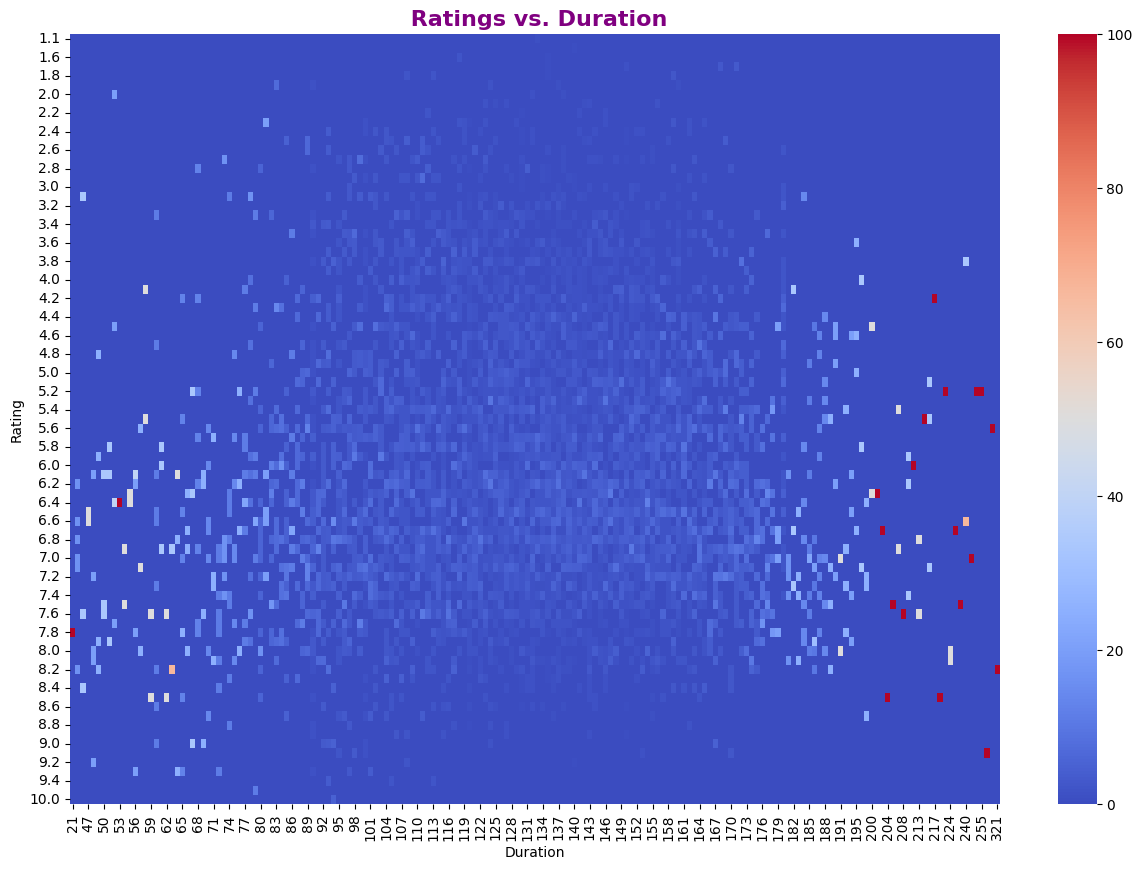

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create a heatmap with a different colormap ('coolwarm')
heatmap = sns.heatmap(
    pd.crosstab(movie['Rating'], movie['Duration'], normalize='columns') * 100,
    cmap='coolwarm',
)

# Set the title with custom color and fontweight
title = " Ratings vs. Duration"
heatmap.set_title(title, fontsize=16, fontweight='bold', color='purple')

plt.xlabel('Duration')
plt.ylabel('Rating')

plt.show()


DATA MODELING

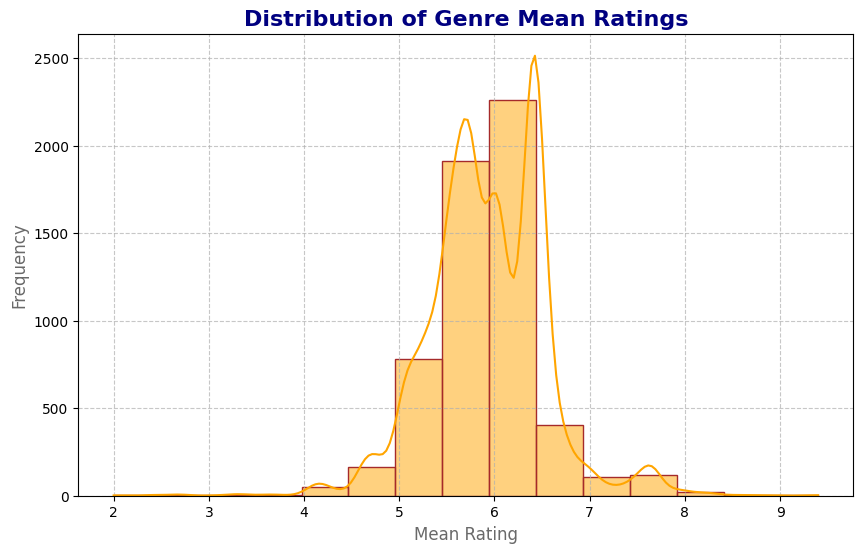

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode 'Genre' based on frequency
genre_counts = movie['Genre'].value_counts()
movie['Genre_encoded'] = movie['Genre'].map(genre_counts)

# Calculate 'Genre_mean_rating' based on the mean rating for each genre
genre_mean_rating = movie.groupby('Genre')['Rating'].transform('mean')
movie['Genre_mean_rating'] = genre_mean_rating

# Create a histogram with custom parameters
plt.figure(figsize=(10, 6))
sns.histplot(
    movie['Genre_mean_rating'],
    bins=15,
    kde=True,
    color='orange',
    edgecolor='brown',  # Add edge color to bars
)

# Customize the plot aesthetics
plt.title('Distribution of Genre Mean Ratings', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mean Rating', fontsize=12, color='dimgray')
plt.ylabel('Frequency', fontsize=12, color='dimgray')

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Mean Squared Error: 0.5150
Mean Absolute Error: 0.5126
R2 Score: 0.7232


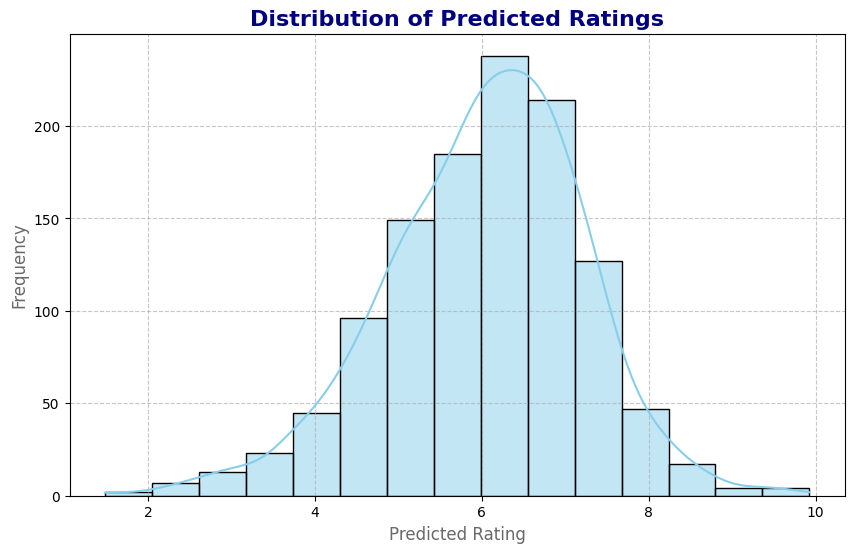

In [29]:

movie['Director_encoded'] = movie.groupby('Director')['Rating'].transform('mean')
movie['Actor_encoded'] = movie.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = movie[features]
y = movie['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=15, color='skyblue', kde=True, edgecolor='black')

plt.title('Distribution of Predicted Ratings', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Predicted Rating', fontsize=12, color='dimgray')
plt.ylabel('Frequency', fontsize=12, color='dimgray')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


Ratings_data

In [34]:
rating=pd.read_csv('Netflix_Dataset_Rating.csv.csv', encoding='latin-1')
rating.dropna(inplace=True)
rating.head(10)

,User_ID,Rating,Movie_ID
0,712664,5.0,3.0
1,1331154,4.0,3.0
2,2632461,3.0,3.0
3,44937,5.0,3.0
4,656399,4.0,3.0
5,439011,1.0,3.0
6,1644750,3.0,3.0
7,2031561,4.0,3.0
8,616720,4.0,3.0
9,2467008,4.0,3.0


In [41]:
rating.shape

(167560, 3)

In [39]:
rating.describe()

,User_ID,Rating,Movie_ID
count,1.675600e+05,167560.000000,167560.000000
mean,1.324382e+06,3.646443,28.737801
std,7.642431e+05,1.027753,8.769132
min,6.000000e+00,1.000000,3.000000
25%,6.618645e+05,3.000000,28.000000
50%,1.321837e+06,4.000000,30.000000
75%,1.986170e+06,4.000000,30.000000
max,2.649429e+06,5.000000,48.000000


In [40]:
rating.isna().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

User_data

In [44]:
user=pd.read_csv('Netflix Userbase.csv', encoding='latin-1')
user.dropna(inplace=True)
user.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [45]:
user.shape

(2500, 10)

In [46]:
user.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
user['Gender']=labelencoder.fit_transform(user['Gender'])
user.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,1,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,0,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,1,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,0,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,1,Smartphone,1 Month


In [49]:
user.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

CONCATENATING THE DATASETS

In [51]:
df_data=pd.concat([movie,rating,user],axis=1)
df_data.dropna()
df_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre_encoded,Genre_mean_rating,...,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,901.0,6.419423,...,2.0,Premium,15.0,05-09-21,22-06-23,Canada,35.0,0.0,Tablet,1 Month
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,107.0,5.716822,...,4.0,Standard,12.0,10-07-22,26-06-23,Australia,51.0,0.0,Laptop,1 Month
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,45.0,6.242222,...,6.0,Premium,15.0,18-03-22,27-06-23,France,29.0,0.0,Smart TV,1 Month
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,5.0,6.820000,...,7.0,Standard,12.0,09-12-21,25-06-23,Brazil,46.0,1.0,Tablet,1 Month
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,9.0,5.477778,...,9.0,Standard,12.0,20-10-22,23-06-23,Spain,37.0,1.0,Smartphone,1 Month
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,45.0,5.337778,...,10.0,Premium,15.0,07-01-23,22-06-23,Italy,44.0,0.0,Smart TV,1 Month
10,1:1.6 An Ode to Lost Love,2004.0,96.0,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,901.0,6.419423,...,11.0,Basic,10.0,16-05-22,22-06-23,United States,31.0,0.0,Smartphone,1 Month
11,1:13:7 Ek Tera Saath,2016.0,120.0,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,75.0,4.665333,...,12.0,Premium,15.0,23-03-23,28-06-23,Canada,45.0,1.0,Tablet,1 Month
12,100 Days,1991.0,161.0,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,3.0,5.400000,...,13.0,Standard,12.0,30-11-21,27-06-23,United Kingdom,48.0,0.0,Laptop,1 Month
13,100% Love,2012.0,166.0,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,188.0,5.765957,...,14.0,Basic,10.0,01-08-22,26-06-23,Australia,27.0,1.0,Smartphone,1 Month


In [52]:
df_data.shape

(167560, 25)

REMOVING UNNECESSARY COLUMNS

In [53]:
df2=df_data.drop(["Monthly Revenue","Plan Duration"],axis=1)
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre_encoded,Genre_mean_rating,...,Rating,Movie_ID,User ID,Subscription Type,Join Date,Last Payment Date,Country,Age,Gender,Device
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,901.0,6.419423,...,4.0,3.0,2.0,Premium,05-09-21,22-06-23,Canada,35.0,0.0,Tablet
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,107.0,5.716822,...,5.0,3.0,4.0,Standard,10-07-22,26-06-23,Australia,51.0,0.0,Laptop
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,45.0,6.242222,...,1.0,3.0,6.0,Premium,18-03-22,27-06-23,France,29.0,0.0,Smart TV
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,5.0,6.820000,...,3.0,3.0,7.0,Standard,09-12-21,25-06-23,Brazil,46.0,1.0,Tablet
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,9.0,5.477778,...,4.0,3.0,9.0,Standard,20-10-22,23-06-23,Spain,37.0,1.0,Smartphone


In [54]:
df2.describe()

,Year,Duration,Rating,Votes,Genre_encoded,Genre_mean_rating,Director_encoded,Actor_encoded,User_ID,Rating,Movie_ID,User ID,Age,Gender
count,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,1.675600e+05,167560.000000,167560.000000,2500.00000,2500.000000,2500.000000
mean,1996.416852,132.294480,5.931875,2611.273116,236.653734,5.931875,5.931875,5.931875,1.324382e+06,3.646443,28.737801,1250.50000,38.795600,0.497200
std,19.914640,26.555826,1.389942,13433.828528,300.497493,0.624430,1.129282,1.044008,7.642431e+05,1.027753,8.769132,721.83216,7.171778,0.500092
min,1931.000000,21.000000,1.100000,5.000000,1.000000,2.000000,1.600000,1.400000,6.000000e+00,1.000000,3.000000,1.00000,26.000000,0.000000
25%,1983.000000,117.000000,5.000000,28.000000,29.000000,5.540157,5.280000,5.322857,6.618645e+05,3.000000,28.000000,625.75000,32.000000,0.000000
50%,2002.000000,134.000000,6.100000,119.000000,118.000000,5.934483,6.023077,6.000000,1.321837e+06,4.000000,30.000000,1250.50000,39.000000,0.000000
75%,2013.000000,150.000000,7.000000,862.500000,329.000000,6.419423,6.700000,6.651852,1.986170e+06,4.000000,30.000000,1875.25000,45.000000,1.000000
max,2021.000000,321.000000,10.000000,591417.000000,901.000000,9.400000,10.000000,10.000000,2.649429e+06,5.000000,48.000000,2500.00000,51.000000,1.000000


In [55]:
df2.isna().sum()

Name                 161709
Year                 161709
Duration             161709
Genre                161709
Rating               161709
Votes                161709
Director             161709
Actor 1              161709
Genre_encoded        161709
Genre_mean_rating    161709
Director_encoded     161709
Actor_encoded        161709
User_ID                   0
Rating                    0
Movie_ID                  0
User ID              165060
Subscription Type    165060
Join Date            165060
Last Payment Date    165060
Country              165060
Age                  165060
Gender               165060
Device               165060
dtype: int64

HANDLING MISSING VALUES


In [56]:
df_final=df2.dropna()

In [57]:
df_final.shape

(979, 23)

<Axes: xlabel='Gender', ylabel='count'>

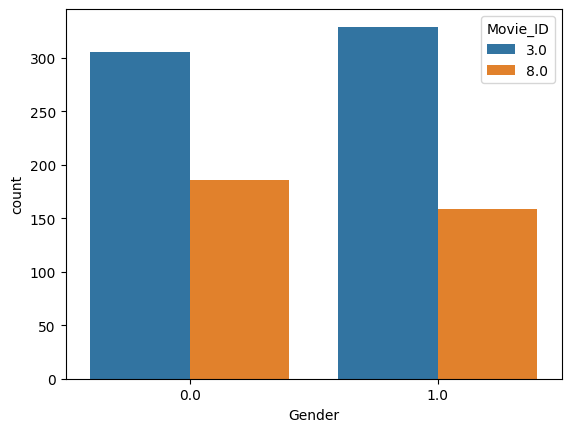

In [58]:
sns.countplot(x=df_final['Gender'],hue=df_final['Movie_ID'])

Text(0.5, 0, 'Ratings')

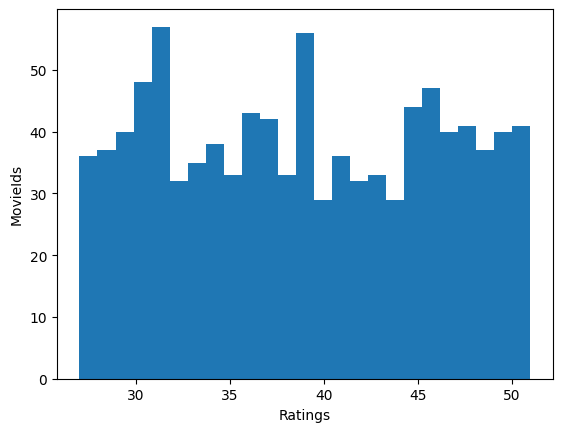

In [59]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

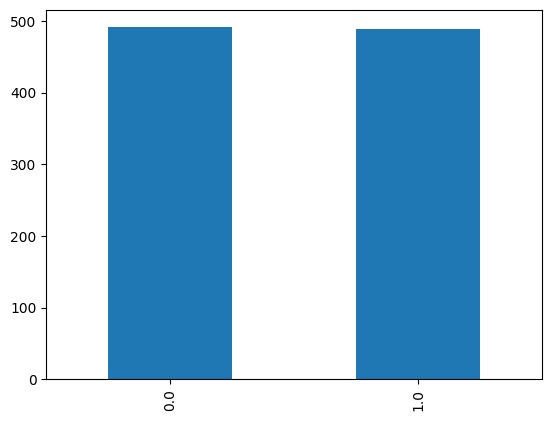

In [60]:
df_final['Gender'].value_counts().plot(kind='bar')
plt.show()

FINAL DATASET

In [61]:
df_final.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre_encoded,Genre_mean_rating,...,Rating,Movie_ID,User ID,Subscription Type,Join Date,Last Payment Date,Country,Age,Gender,Device
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,901.0,6.419423,...,4.0,3.0,2.0,Premium,05-09-21,22-06-23,Canada,35.0,0.0,Tablet
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,107.0,5.716822,...,5.0,3.0,4.0,Standard,10-07-22,26-06-23,Australia,51.0,0.0,Laptop
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,45.0,6.242222,...,1.0,3.0,6.0,Premium,18-03-22,27-06-23,France,29.0,0.0,Smart TV
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,5.0,6.820000,...,3.0,3.0,7.0,Standard,09-12-21,25-06-23,Brazil,46.0,1.0,Tablet
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,9.0,5.477778,...,4.0,3.0,9.0,Standard,20-10-22,23-06-23,Spain,37.0,1.0,Smartphone


In [62]:
input=df_final.drop(['Rating','User_ID','Gender','Movie_ID'],axis=1)
target=df_final['Rating']

In [63]:
target.head()

,Rating,Rating
1,7.0,4.0
3,4.4,5.0
5,4.7,1.0
6,7.4,3.0
8,5.6,4.0


In [64]:
input.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Genre_encoded,Genre_mean_rating,Director_encoded,Actor_encoded,User ID,Subscription Type,Join Date,Last Payment Date,Country,Age,Device
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,8.0,Gaurav Bakshi,Rasika Dugal,901.0,6.419423,7.000000,6.850000,2.0,Premium,05-09-21,22-06-23,Canada,35.0,Tablet
3,#Yaaram,2019.0,110.0,"Comedy, Romance",35.0,Ovais Khan,Prateik,107.0,5.716822,4.400000,5.420000,4.0,Standard,10-07-22,26-06-23,Australia,51.0,Laptop
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",827.0,Rahul Rawail,Bobby Deol,45.0,6.242222,5.313333,4.788889,6.0,Premium,18-03-22,27-06-23,France,29.0,Smart TV
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",1086.0,Shoojit Sircar,Jimmy Sheirgill,5.0,6.820000,7.383333,5.435000,7.0,Standard,09-12-21,25-06-23,Brazil,46.0,Tablet
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",326.0,Allyson Patel,Yash Dave,9.0,5.477778,5.600000,5.600000,9.0,Standard,20-10-22,23-06-23,Spain,37.0,Smartphone


In [66]:
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
data = fetch_openml(data_id=42165, as_frame=True)
X = data.data  # Features
y = data.target  # Target variable

# Now, you can work with X and y as your data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


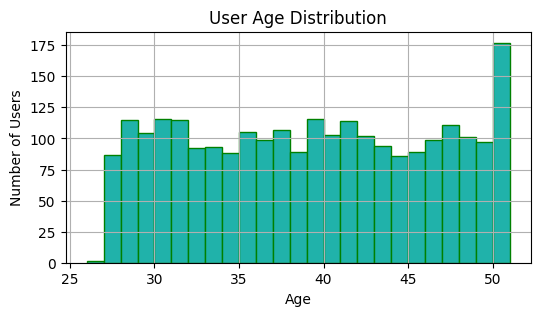

In [68]:
#Create a histogram to visualize the user age distribution

plt.figure(figsize=(6, 3))

plt.hist(user['Age'], bins=25, color='lightseagreen', edgecolor='green')

plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')

plt.grid(True)

plt.show()

In [69]:
#Define age bins and labels
age_bins=[8, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+' ]
#Add a new column with age groups

df_data['Age Group']=pd.cut (df_data ['Age'], bins=age_bins, labels=age_labels)
df_data[['Age', 'Age Group']].drop_duplicates()[:10]

,Age,Age Group
1,35.0,26-35
3,51.0,46-55
5,29.0,26-35
6,46.0,46-55
8,37.0,36-45
9,44.0,36-45
10,31.0,26-35
11,45.0,36-45
12,48.0,46-55
13,27.0,26-35


<function matplotlib.pyplot.show(close=None, block=None)>

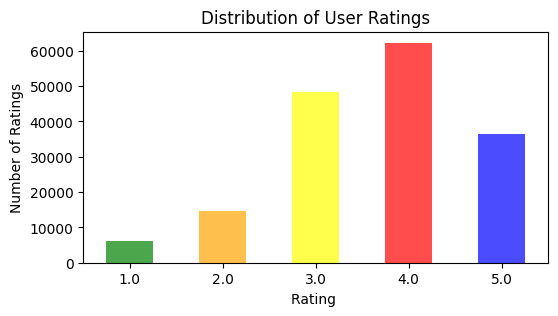

In [71]:
#Define colors for each rating value
import matplotlib.pyplot as plt
rating_counts=rating['Rating'].value_counts().sort_index()
colors = ['green','orange','yellow','red','blue']
plt.figure(figsize=(6, 3))
rating_counts.plot(kind='bar', alpha=0.7, color=colors)
plt.title('Distribution of User Ratings' )
plt.xlabel('Rating ')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show

In [72]:
print(df_data.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Genre_encoded', 'Genre_mean_rating', 'Director_encoded',
       'Actor_encoded', 'User_ID', 'Rating', 'Movie_ID', 'User ID',
       'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Age Group'],
      dtype='object')


In [73]:
groupedby_movie = df_data.groupby('Name')
groupedby_rating = df_data.groupby( 'Gender')
groupedby_uid=df_data.groupby( 'User_ID')

In [74]:
movies=df_data.groupby('Name').size().sort_values(ascending=True)[:1000]
print(movies)

Name
#Gadhvi (He thought he was Gandhi)    1
OMG: Oh My God!                       1
OK Jaanu                              1
O Teri                                1
Nympho: The Lust Story                1
                                     ..
Kismat Konnection                     1
Kishen Kanhaiya                       1
Ko: Yad                               1
Kodiparakkudu                         1
Kohinoor                              1
Length: 1000, dtype: int64
